In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_csv('iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.nunique(axis=0)

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

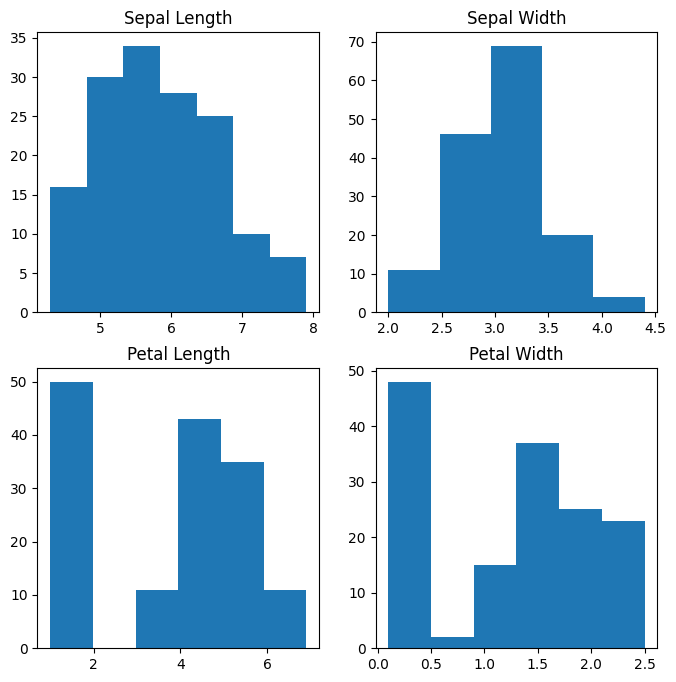

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['PetalWidthCm'], bins=6);

C:\Users\HP\AppData\Local\Temp\ipykernel_7824\3328440385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson').drop(


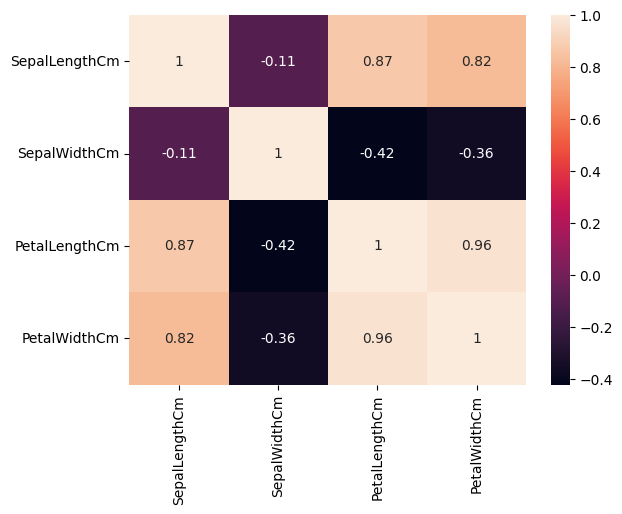

In [12]:
sns.heatmap(data.corr(method='pearson').drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);
 
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=data[['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm']]

In [15]:
y=data['Species']

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.59)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions=logmodel.predict(x_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.96      0.90      0.93        29
 Iris-virginica       0.90      0.96      0.93        28

       accuracy                           0.96        89
      macro avg       0.95      0.95      0.95        89
   weighted avg       0.96      0.96      0.96        89

